# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('who.csv')

In [2]:
df = df.drop(columns=['iso2', 'iso3'])
#df.info()

# Key Insights

- The most affected age is group is 34-44 years. 
- About 30 out of 219 countries were the most affected by TB cases, among them highest cases were in India and China. No Relapse cases were reported in India. India started reporting cases from 1995 to 2012.
- China reported the cases (Postive, Negative, ExtraPulmonary) (Case=~90K) in 2012. In 2013, China reported the over 84K Relapse cases, which means those 84K didn't cure TB.
- For Pulmonary Smear +, the cases were noted First case was reported in 1980 in Cook Islands, where 15-24 age group has more affected, i.e. 5 cases (Females:3, Males:2)
- Pulmponary cases started rising from 1995, after 2005 the downtrend was observed.
-  In India, the maximum cases were noted in 2012, the age group which was affected was 15-24, the cases continued to rise till 2012 and then from 2013, the cases were not reported.
- From 1980, the cases of Pulmonary Positive started reporting, after the year 2000 the cases of negative pulmonary and extrapulmonary started reporting. In the year 2010, the relapse cases were reported. Over 90% of relapse cases were reported in 2013. The Graphical Analysis is shown below for the same.
- For the Negative Pulmonary type, the highest number of cases were noted by India in 2007 and in the year 2012, China had the highest number of Negative Pulmonary cases.

# Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [3]:
# How many countries are present?
countries= set(df['country'])
#countries= {df.country}
print('The number of countries present are ',len(countries))

The number of countries present are  219


In [4]:
#What's the timespan of the data?
print('Time Span is from ',df['year'].min(),'to ',df['year'].max())

Time Span is from  1980 to  2013


In [5]:
# Does each country have a row for every year present?
print( 'Country ',len(set(df['country'])))
print('Years ',len(set(df['year'])))
print('Total Rows',len(df))
print('Total rows should be ',219*34)
print('This suggest that the not every country has a row present for every year')

Country  219
Years  34
Total Rows 7240
Total rows should be  7446
This suggest that the not every country has a row present for every year


In [6]:
# Which countries are missing years?
# Every country should have repeated for 34 times not to get missed if any country has less than 34 repeats,
#this means it is missing in any year
#Approach 2
#df[df['country']=='Afghanistan']
#def countcountry(df,col,country):
#    if (df[col] in )
country_counts=df['country'].value_counts()
country_counts[country_counts<34]
#df[df['country']=="Serbia"]

Netherlands Antilles                 30
Serbia & Montenegro                  25
Timor-Leste                          12
Montenegro                            9
Serbia                                9
Sint Maarten (Dutch part)             4
Curacao                               4
Bonaire, Saint Eustatius and Saba     4
South Sudan                           3
Name: country, dtype: int64

In [58]:
# How many rows have at least 1 non-null values across the columns 3-57?
df.columns
temp = df.drop(columns=['country','year'],axis=1)
len(temp[temp.notnull()])
#len(temp.notnull())

7240

# Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
  

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

### The conversion to long format is done according to type of Smear and Gender individually

#### Pulmonary Smear +

In [8]:
posSmear=df[df.columns[:16]]
#df.tail()

In [9]:
posSmearFemale=posSmear.drop(columns=posSmear.columns[2:9])
posSmearFemale
posSmearMale=df[df.columns[:9]]
posSmearMale.columns

Index(['country', 'year', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65'],
      dtype='object')

In [10]:
posSmearMaleMelt= posSmearMale.melt(id_vars=['country','year'], value_vars=['new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65'])
posSmearMaleMelt

,country,year,variable,value
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN
...,...,...,...,...
50675,Zimbabwe,2009,new_sp_m65,192.0
50676,Zimbabwe,2010,new_sp_m65,252.0
50677,Zimbabwe,2011,new_sp_m65,278.0
50678,Zimbabwe,2012,new_sp_m65,271.0


In [11]:
posSmearFemaleMelt= posSmearFemale.melt(id_vars=['country','year'], value_vars=['new_sp_f014','new_sp_f1524','new_sp_f2534','new_sp_f3544','new_sp_f4554','new_sp_f5564','new_sp_f65'])
posSmearFemaleMelt[posSmearFemaleMelt['country']=='Afghanistan']


,country,year,variable,value
0,Afghanistan,1980,new_sp_f014,NaN
1,Afghanistan,1981,new_sp_f014,NaN
2,Afghanistan,1982,new_sp_f014,NaN
3,Afghanistan,1983,new_sp_f014,NaN
4,Afghanistan,1984,new_sp_f014,NaN
...,...,...,...,...
43469,Afghanistan,2009,new_sp_f65,419.0
43470,Afghanistan,2010,new_sp_f65,488.0
43471,Afghanistan,2011,new_sp_f65,535.0
43472,Afghanistan,2012,new_sp_f65,505.0


#### Pulmonary Smear -

In [12]:
#NegSmearMale = 
NegSmearCols=df.columns[16:30]
NegSmearCols[:7]
#Country Year
yearCountry = df[df.columns[:2]]

NegSmearMale=df[NegSmearCols[:7]]
NegSmearMale =yearCountry.join(NegSmearMale)
NegSmearMaleMelt = NegSmearMale.melt(id_vars=['country','year'],value_vars=NegSmearCols[:7])
NegSmearMaleMelt

NegSmearFemale= df[NegSmearCols[7:]]
NegSmearFemale = yearCountry.join(NegSmearFemale)
NegSmearFemaleMelt = NegSmearFemale.melt(id_vars=['country','year'], value_vars=NegSmearCols[7:])
NegSmearFemaleMelt

,country,year,variable,value
0,Afghanistan,1980,new_sn_f014,NaN
1,Afghanistan,1981,new_sn_f014,NaN
2,Afghanistan,1982,new_sn_f014,NaN
3,Afghanistan,1983,new_sn_f014,NaN
4,Afghanistan,1984,new_sn_f014,NaN
...,...,...,...,...
50675,Zimbabwe,2009,new_sn_f65,514.0
50676,Zimbabwe,2010,new_sn_f65,563.0
50677,Zimbabwe,2011,new_sn_f65,495.0
50678,Zimbabwe,2012,new_sn_f65,432.0


#### ExtraPulmonary

In [14]:
ExSmearCols = df.columns[30:44]
ExSmearCols
ExSmearMale = df[ExSmearCols[:7]]
ExSmearMale = yearCountry.join(ExSmearMale)
ExSmearMaleMelt = ExSmearMale.melt(id_vars=['country','year'], value_vars=ExSmearCols[:7]) 


ExSmearFemale = df[ExSmearCols[7:]]
ExSmearFemale= yearCountry.join(ExSmearFemale)
ExSmearFemaleMelt = ExSmearFemale.melt(id_vars=['country','year'], value_vars=ExSmearCols[7:])
ExSmearFemaleMelt

,country,year,variable,value
0,Afghanistan,1980,new_ep_f014,NaN
1,Afghanistan,1981,new_ep_f014,NaN
2,Afghanistan,1982,new_ep_f014,NaN
3,Afghanistan,1983,new_ep_f014,NaN
4,Afghanistan,1984,new_ep_f014,NaN
...,...,...,...,...
50675,Zimbabwe,2009,new_ep_f65,138.0
50676,Zimbabwe,2010,new_ep_f65,146.0
50677,Zimbabwe,2011,new_ep_f65,129.0
50678,Zimbabwe,2012,new_ep_f65,143.0


### Relapse

In [15]:
RepSmearCols = df.columns[44:]
RepSmearMale = df[RepSmearCols[:7]]
RepSmearMale = yearCountry.join(RepSmearMale)
RepSmearMaleMelt = RepSmearMale.melt(id_vars=['country','year'],value_vars=RepSmearCols[:7])
RepSmearMaleMelt

RepSmearFemale = df[RepSmearCols[7:]]
RepSmearFemale = yearCountry.join(RepSmearFemale)
RepSmearFemaleMelt = RepSmearFemale.melt(id_vars=['country','year'],value_vars=RepSmearCols[7:])
RepSmearFemaleMelt

,country,year,variable,value
0,Afghanistan,1980,newrel_f014,NaN
1,Afghanistan,1981,newrel_f014,NaN
2,Afghanistan,1982,newrel_f014,NaN
3,Afghanistan,1983,newrel_f014,NaN
4,Afghanistan,1984,newrel_f014,NaN
...,...,...,...,...
50675,Zimbabwe,2009,newrel_f65,NaN
50676,Zimbabwe,2010,newrel_f65,NaN
50677,Zimbabwe,2011,newrel_f65,NaN
50678,Zimbabwe,2012,newrel_f65,NaN


# Question 3: Create a graph that shows when countries started to report TB cases.

#### From 1980, the cases of Pulmonary Positive started reporting, after the year 2000 the cases of negative pulmonary and extrapulmonary started reporting. In the year 2010, the relapse cases were reported. Over 90% of relapse cases were reported in 2013. The Graphical Analysis is shown below for the same.

#### The below graph is overall trend of the Pulmonary positive smear, it's when the cases started reporting initially. The graphs according to genders and ages are plotted down.  

<AxesSubplot:xlabel='year', ylabel='Pulmonary Smear (+)'>

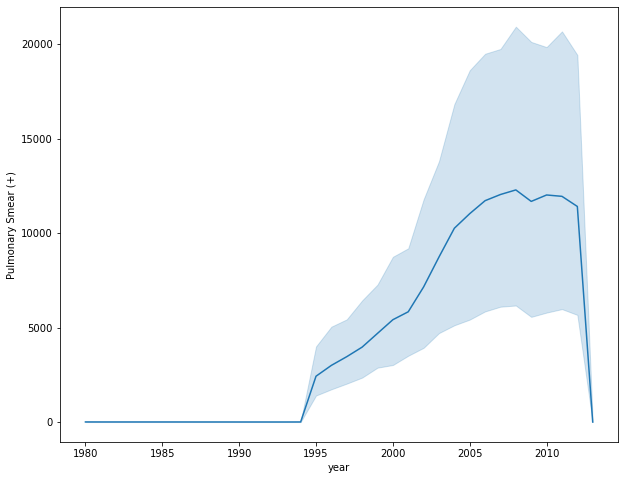

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=finalDF,x='year',y='Pulmonary Smear (+)')

## Positive Smear 

Text(0.5, 1.0, 'Positive Smear Female')

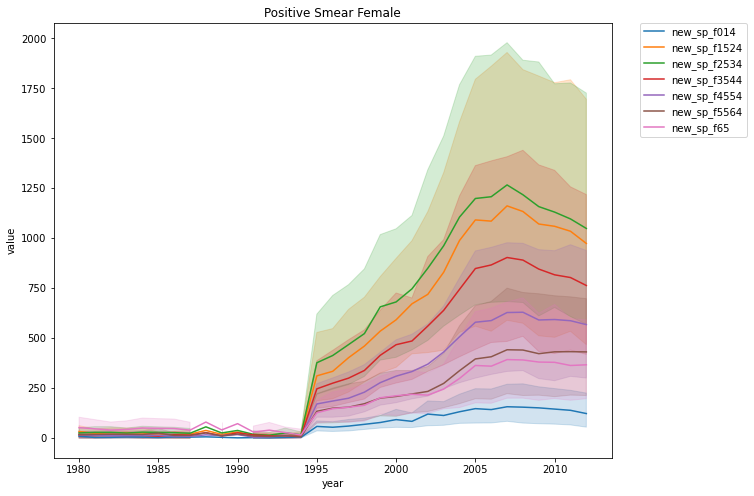

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
plot1 = sns.lineplot(data=posSmearFemaleMelt,x='year',y='value',hue='variable')
# Put the legend out of the figure    "The line "
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Positive Smear Female")

In [21]:
#For Pulmonary Smear +, the cases were noted First case was reported in 1980 in Cook Islands, where 15-24 age group has more affected, i.e. 5 cases (Females:3, Males:2)
posSmearFemaleMelt[(posSmearFemaleMelt['value']<8) &(posSmearFemaleMelt['year']<1981) ]

#Pulmponary cases started rising from 1995, after 2005 the downtrend was observed.

#posSmearFemaleMelt[posSmearFemaleMelt['value']>1200]
posSmearFemaleMelt[(posSmearFemaleMelt['country']=='India') & (posSmearFemaleMelt['year']==2005) ]

,country,year,variable,value
3025,India,2005,new_sp_f014,6292.0
10265,India,2005,new_sp_f1524,45136.0
17505,India,2005,new_sp_f2534,45629.0
24745,India,2005,new_sp_f3544,28577.0
31985,India,2005,new_sp_f4554,17042.0
39225,India,2005,new_sp_f5564,10513.0
46465,India,2005,new_sp_f65,5408.0


In [22]:
# In India, the maximum cases were noted in 2012, the age group which was affected was 15-24,
# the cases continued to rise till 2012 and then from 2013, the cases were not reported.
#posSmearFemaleMelt['value'].max()
posSmearFemaleMelt[posSmearFemaleMelt['value'] == 53975]

posSmearFemaleMelt[(posSmearFemaleMelt['year'] ==2013) & (posSmearFemaleMelt['country']=='India') ]

# Most affected country, these are the countries which reported more than 100 cases after 2005
MostAffectedCountries= set(df['country'])-set(posSmearFemaleMelt[(posSmearFemaleMelt['value'] <100) & (posSmearFemaleMelt['year']> 2005)]['country'])
print('About 30 out of 219 countries were the most affected by TB cases')


About 30 out of 219 countries were the most affected by TB cases


Text(0.5, 1.0, 'Positive Smear Male')

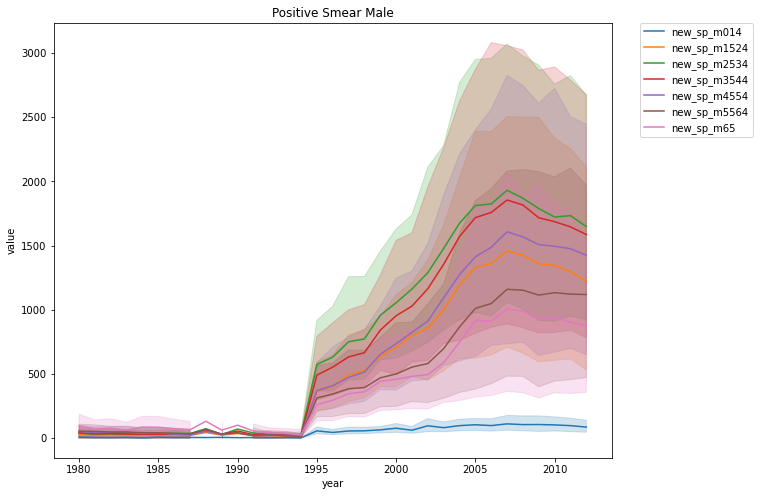

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=posSmearMaleMelt,x='year',y='value',hue='variable')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Positive Smear Male")

In [24]:
#sns.pairplot(data=posSmearFemaleMelt)
posSmearMaleMelt[(posSmearMaleMelt['value']<8) &(posSmearMaleMelt['year']<1981) ]

# The males in India (Age: 35-44) reported more than 90,000 cases which is almost double than the female cases reported in India
posSmearMaleMelt[posSmearMaleMelt['value']== 90830]

,country,year,variable,value
24749,India,2009,new_sp_m3544,90830.0


In [132]:
#posSmearMaleMelt[posSmearMaleMelt['value']<10]

## Negative Smear

Text(0.5, 1.0, 'Negative Smear Male')

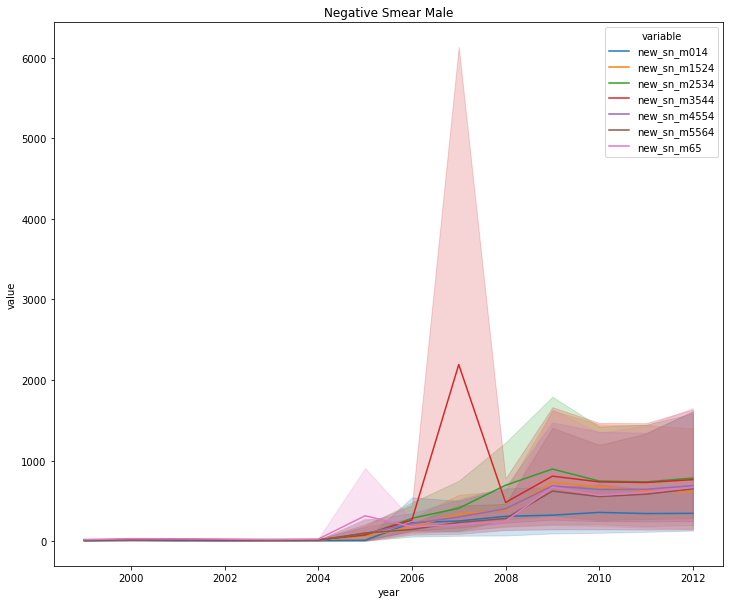

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=NegSmearMaleMelt,x='year',y='value',hue='variable')
plt.title("Negative Smear Male")

In [29]:
NegSmearMaleMelt[(NegSmearMaleMelt['year']>2004) & (NegSmearMaleMelt['year']<2006)]
print(NegSmearMaleMelt['value'].max())
NegSmearMaleMelt[NegSmearMaleMelt['value'] == 250051]


#NegSmearFemaleMelt[(NegSmearMaleMelt['year'] == 2007) & (NegSmearFemaleMelt['country']=='India')]


250051.0


,country,year,variable,value
24747,India,2007,new_sn_m3544,250051.0


Text(0.5, 1.0, 'Negative Smear Female')

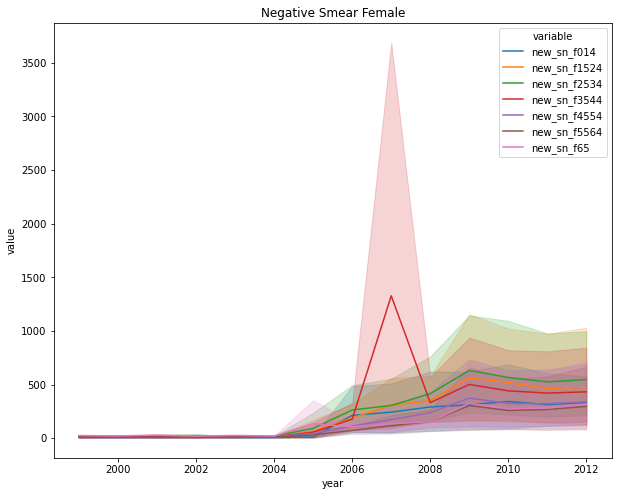

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data=NegSmearFemaleMelt,x='year',y='value',hue='variable')
plt.title('Negative Smear Female')

In [69]:
finalDF[(finalDF['year']==2012) & (finalDF['country']=='India')]

,year,country,Pulmonary Smear (+),Pulmonary Smear (-),Extrapulmonary,Relapse
3032,2012,India,629589.0,0.0,0.0,0.0


## Extrapulmonary 

Text(0.5, 1.0, 'Extrapulmonary Smear Female')

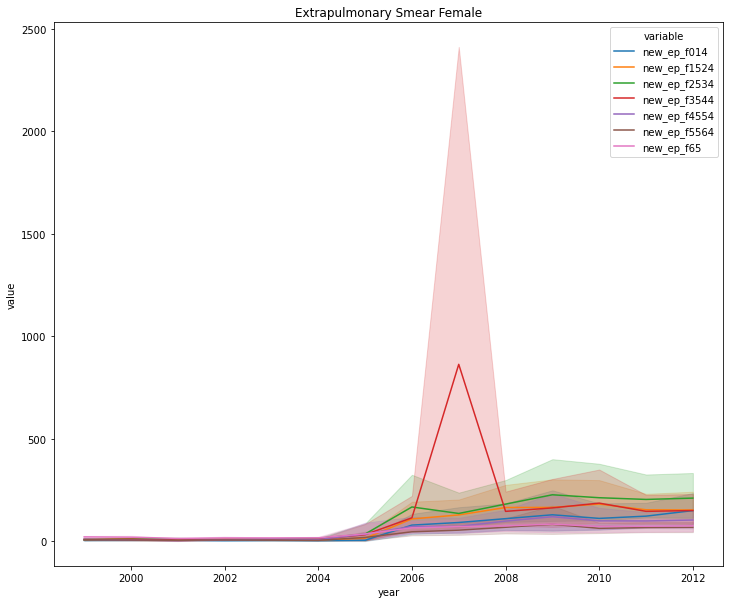

In [31]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=ExSmearFemaleMelt,x='year',y='value',hue='variable')
plt.title('Extrapulmonary Smear Female')

Text(0.5, 1.0, 'Extrapulmonary Smear Male')

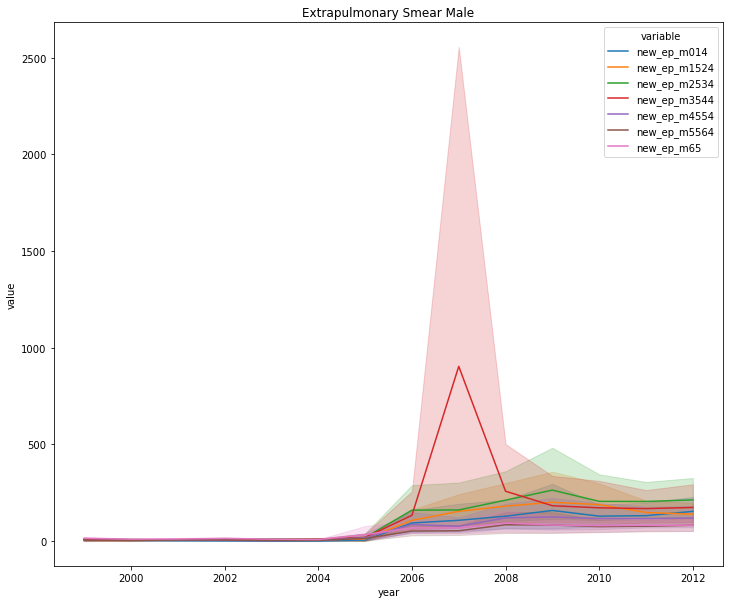

In [32]:
fig, ax = plt.subplots(figsize=(12,10))
sns.lineplot(data=ExSmearMaleMelt,x='year',y='value',hue='variable')
plt.title('Extrapulmonary Smear Male')

In [117]:
ExSmearFemaleMelt['value'].max()
ExSmearFemaleMelt[ExSmearFemaleMelt['value'] == 101015]
#set(ExSmearFemaleMelt[ExSmearFemaleMelt['value']>1000]['country'])
ExSmearMaleMelt['value'].max() + ExSmearFemaleMelt['value'].max()

206840.0

In [ ]:
sns.lineplot(data= )

# Extras

In [34]:
# In this cell, I have fill the missing values with value 0 and done the mapping based on the mean obtained from it
# to the respective categories given.

# For the NaN values, I first tried dropping those values either by droping the row and the column.
# But it resulted into dropping everything.
# So I decided to fill those NaN values with 0 so that the sum won't get disturbed.

#trialdf1.drop(columns=trialdf1[17:])
#trialdf1=trialdf1.drop(columns=[['country','year']])
#Pulmonary Smear
#trialdf1.drop(columns=['country','year'],inplace=True)
#trialdf1.drop(columns=[trialdf1.columns[14:]])

#trialdf1=trialdf1.drop(columns=trialdf1.columns[14:57])
# trialdf1['Pulmonary Smear (+)']= trialdf1.mean(axis=1)
# trialdf1

trialdf1= df.fillna(0)
trialdf1.columns
trialdf1.drop(columns=['country','year'],inplace=True)
trialdf1.drop(columns=trialdf1.columns[14:],inplace=True)
trialdf1['Pulmonary Smear (+)']= trialdf1.sum(axis=1)
#print(trialdf1)

trialdf2= df.fillna(0)
trialdf2.columns
trialdf2.drop(columns=['country','year'],inplace=True)
trialdf2.drop(columns=trialdf2.columns[0:14],inplace=True)
trialdf2.drop(columns=trialdf2.columns[14:],inplace=True)
trialdf2['Pulmonary Smear (-)']= trialdf2.sum(axis=1)
#print(trialdf2.columns)

trialdf3= df.fillna(0)
trialdf3.drop(columns=['country','year'],inplace=True)
trialdf3.drop(columns=trialdf3.columns[0:28],inplace=True)
trialdf3.drop(columns=trialdf3.columns[14:29],inplace=True)
trialdf3['Extrapulmonary']= trialdf3.sum(axis=1)
#print(trialdf3.columns)


trialdf4= df.fillna(0)
trialdf4.columns
trialdf4.drop(columns=['country','year'],inplace=True)
trialdf4.drop(columns=trialdf4.columns[0:42],inplace=True)
trialdf4.drop(columns=trialdf4.columns[14:29],inplace=True)
trialdf4['Relapse']= trialdf4.sum(axis=1)
#print(trialdf4.columns)

In [35]:
combinedDF = trialdf1.join(trialdf2)
combinedDF = combinedDF.join(trialdf3)
combinedDF = combinedDF.join(trialdf4)

In [36]:
combinedDF

,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,...,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65,Relapse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,125.0,578.0,0.0,3471.0,681.0,293.0,192.0,180.0,873.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7236,150.0,710.0,2208.0,1682.0,761.0,350.0,252.0,173.0,974.0,2185.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7237,152.0,784.0,2467.0,2071.0,780.0,377.0,278.0,174.0,1084.0,2161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7238,120.0,783.0,2421.0,2086.0,796.0,360.0,271.0,173.0,939.0,2053.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
 yeardf= df[['year','country']]
combinedDF=combinedDF.join(yeardf)
finalDF = combinedDF[['year','country','Pulmonary Smear (+)','Pulmonary Smear (-)','Extrapulmonary','Relapse']]
# finalDF = combinedDF.drop(columns=[['new_sp_m014', 'new_sp_m1524', 'new_sp_m2534', 'new_sp_m3544',
#        'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65', 'new_sp_f014',
#        'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544', 'new_sp_f4554',
#        'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
#        'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554',
#        'new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
#        'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564',
#        'new_sn_f65', 'new_ep_m014', 'new_ep_m1524',
#        'new_ep_m2534', 'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564',
#        'new_ep_m65', 'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534',
#        'new_ep_f3544', 'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65',
#         'newrel_m014', 'newrel_m1524', 'newrel_m2534',
#        'newrel_m3544', 'newrel_m4554', 'newrel_m5564', 'newrel_m65',
#        'newrel_f014', 'newrel_f1524', 'newrel_f2534', 'newrel_f3544',
#        'newrel_f4554', 'newrel_f5564', 'newrel_f65','year',
#        'country']]
finalDF
#combinedDF

,year,country,Pulmonary Smear (+),Pulmonary Smear (-),Extrapulmonary,Relapse
0,1980,Afghanistan,0.0,0.0,0.0,0.0
1,1981,Afghanistan,0.0,0.0,0.0,0.0
2,1982,Afghanistan,0.0,0.0,0.0,0.0
3,1983,Afghanistan,0.0,0.0,0.0,0.0
4,1984,Afghanistan,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7235,2009,Zimbabwe,10195.0,24890.0,6683.0,0.0
7236,2010,Zimbabwe,11654.0,25157.0,6061.0,0.0
7237,2011,Zimbabwe,12596.0,19172.0,5192.0,0.0
7238,2012,Zimbabwe,12163.0,17316.0,4912.0,0.0


In [39]:
maxvalP=finalDF['Pulmonary Smear (+)'].max()
maxvalN=finalDF['Pulmonary Smear (-)'].max()
maxvalE=finalDF['Extrapulmonary'].max()
maxvalR=finalDF['Relapse'].max()
# print(finalDF[finalDF['Pulmonary Smear (+)']== maxvalP])
# print(finalDF[finalDF['Pulmonary Smear (-)']== maxvalN])
# print(finalDF[finalDF['Extrapulmonary']== maxvalE])
# print(finalDF[finalDF['Relapse']== maxvalR])

In [40]:
finalDF[finalDF['Pulmonary Smear (+)']== maxvalP]

,year,country,Pulmonary Smear (+),Pulmonary Smear (-),Extrapulmonary,Relapse
3031,2011,India,642311.0,0.0,0.0,0.0


In [41]:
finalDF[finalDF['Pulmonary Smear (-)']== maxvalN]

,year,country,Pulmonary Smear (+),Pulmonary Smear (-),Extrapulmonary,Relapse
1430,2012,China,316332.0,536050.0,6479.0,0.0


In [42]:
finalDF[finalDF['Extrapulmonary']== maxvalE]

,year,country,Pulmonary Smear (+),Pulmonary Smear (-),Extrapulmonary,Relapse
3027,2007,India,592587.0,398862.0,206840.0,0.0


In [43]:
finalDF[finalDF['Relapse']== maxvalR]

,year,country,Pulmonary Smear (+),Pulmonary Smear (-),Extrapulmonary,Relapse
1431,2013,China,0.0,0.0,0.0,847176.0


<AxesSubplot:xlabel='year', ylabel='Pulmonary Smear (+)'>

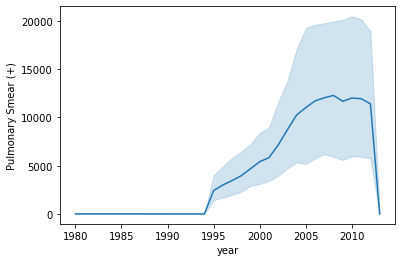

In [45]:
sns.lineplot(data=finalDF,x='year',y='Pulmonary Smear (+)')

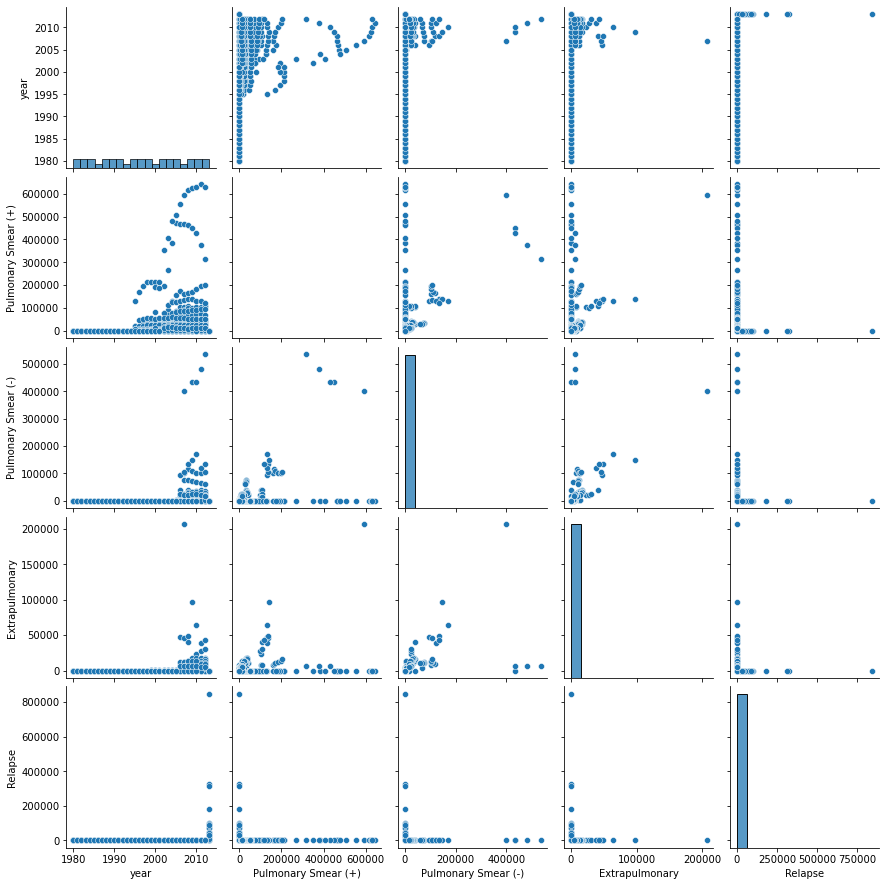

In [46]:
sns.pairplot(finalDF)

In [48]:
set(finalDF[finalDF['Pulmonary Smear (+)']>20000]['country'])

{'Angola',
 'Bangladesh',
 'Brazil',
 'Cambodia',
 'China',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Ethiopia',
 'India',
 'Indonesia',
 'Kenya',
 'Myanmar',
 'Nigeria',
 'Pakistan',
 'Peru',
 'Philippines',
 'Russian Federation',
 'South Africa',
 'Thailand',
 'Uganda',
 'Ukraine',
 'United Republic of Tanzania',
 'Viet Nam'}

In [51]:
finalDF[(finalDF['Relapse'].notnull()) & (finalDF['Relapse']>100)]

,year,country,Pulmonary Smear (+),Pulmonary Smear (-),Extrapulmonary,Relapse
33,2013,Afghanistan,0.0,0.0,0.0,3454.0
67,2013,Albania,0.0,0.0,0.0,474.0
101,2013,Algeria,0.0,0.0,0.0,7124.0
203,2013,Angola,0.0,0.0,0.0,21661.0
305,2013,Argentina,0.0,0.0,0.0,8892.0
...,...,...,...,...,...,...
7035,2013,Venezuela (Bolivarian Republic of),0.0,0.0,0.0,6555.0
7069,2013,Viet Nam,0.0,0.0,0.0,50607.0
7171,2013,Yemen,0.0,0.0,0.0,10327.0
7205,2013,Zambia,0.0,0.0,0.0,40638.0
